In [29]:
import mockmodel as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
zzr   = np.pi/2-tt


rhod  = d.rhodust[:,:,0,0]
temp  = d.dusttemp[:,:,0,0]

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


In [30]:
# Inspect the array informations in variable
#dtbg_mid, dtbg_sur, dtsm_mid, dtsm_sur all has size(100,200) and only have 0 value seems like
# zzr,rr,tt have size (100,32)

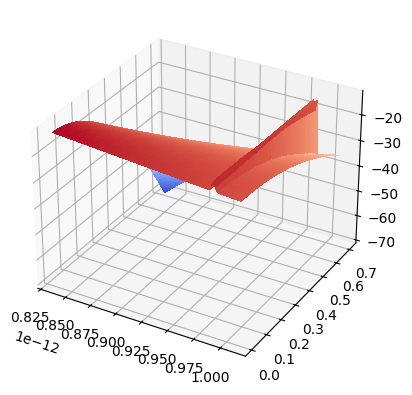

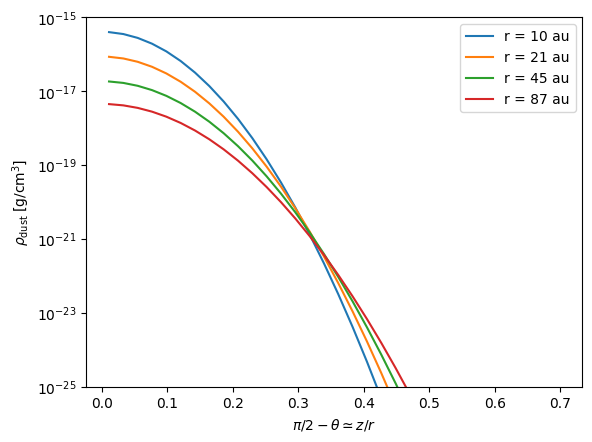

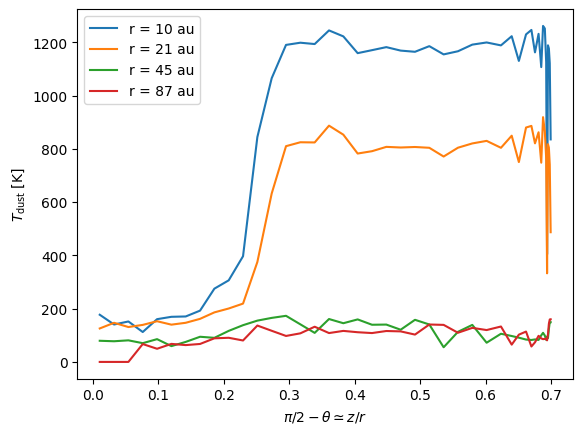

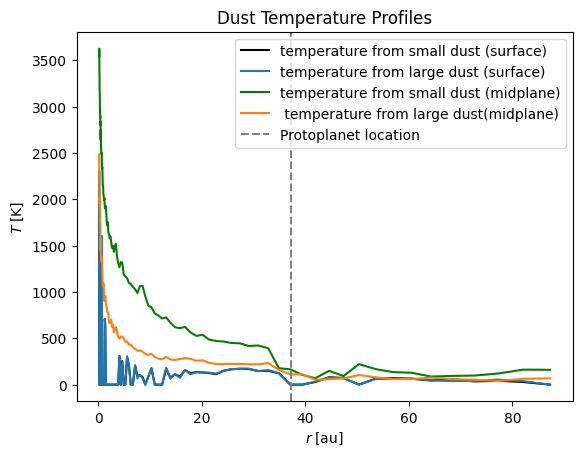

C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\3308664117.py:63: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), '-', label='temperature from small dust (surface)', color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\3308664117.py:64: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), '-', label='temperature from large dust (surface)', color='C0')


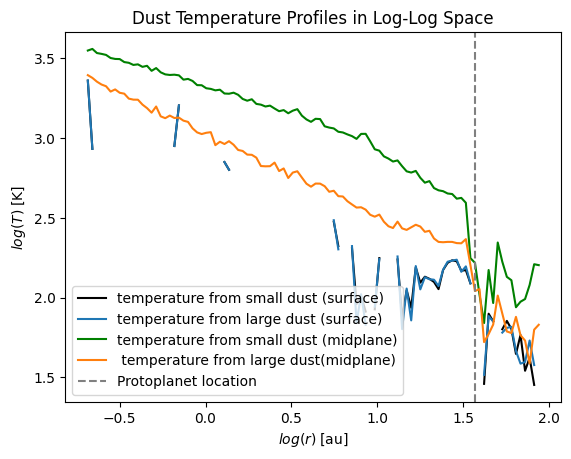

In [33]:


#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,0], '-', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,1], '-', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), '-', label='temperature from small dust (surface)', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), '-', label='temperature from large dust (surface)', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]),'-', label='temperature from small dust (midplane)', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]),'-', label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.legend()

plt.show()


C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\183425076.py:11: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), ':', color='C0')


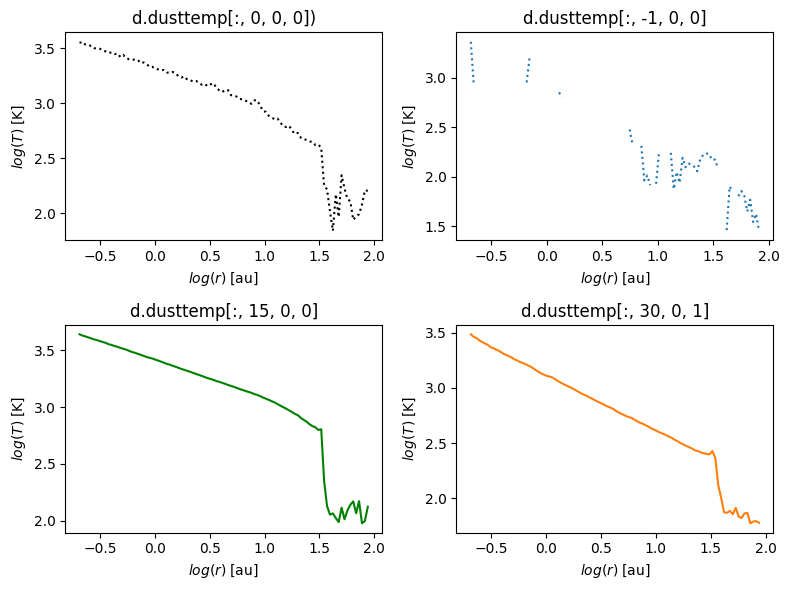

In [23]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 0]), ':', color='black')
axs[0, 0].set_title('d.dusttemp[:, 0, 0, 0])')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), ':', color='C0')
axs[0, 1].set_title('d.dusttemp[:, -1, 0, 0]')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 15, 0, 0]), color='green')
axs[1, 0].set_title('d.dusttemp[:, 15, 0, 0]')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 30, 0, 1]), color='C1')
axs[1, 1].set_title('d.dusttemp[:, 30, 0, 1]')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# How temperature changes with z for a given drop r
#I thi
print(d.dusttemp[20, :, 0,0])

[2477.6409722  2876.48267976 3014.03180385 3040.62723827 2331.38871081
 2909.67619064 3104.88185072 3097.5933646  2807.89961578 3039.1336654
 2932.12720037 3076.31207204 3070.81759431 2829.92128092 3016.20493077
 2946.78819519 2990.59622938 2981.5320802  2934.21045388 2901.31337867
 2936.66741132 2931.27110863 2930.18848373 2947.858661   2927.3365703
 2902.59008407 3009.74763878 3087.49823286 2990.22094933 3013.97612662
 2984.16825124 2850.2370737  2984.48890534 2713.57483064 1861.36491386
 1278.19726897 1078.82470575  829.80922632  581.10635529  514.77139945
  500.83768611  747.36918445  924.66366861 1604.12232772]


The shape of x is (100, 200)
The shape of y is (100, 200)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\152280388.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')


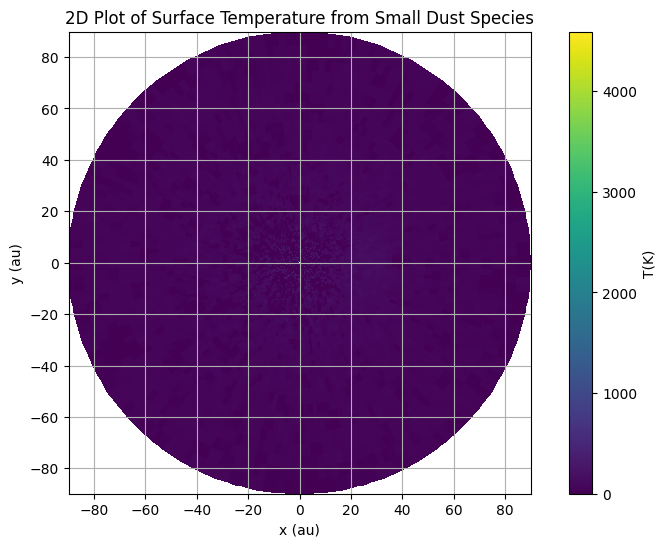

C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\152280388.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')


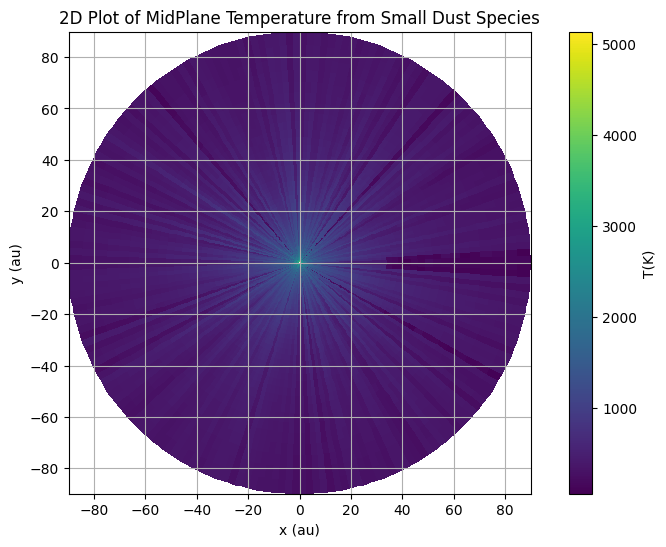

C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\152280388.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')


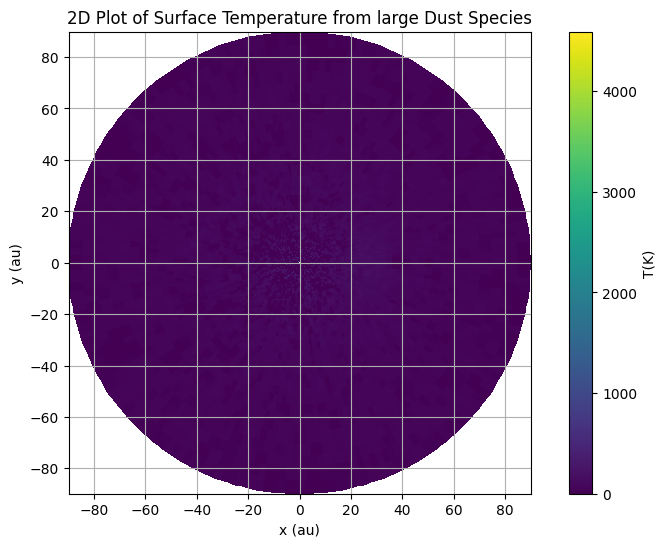

C:\Users\LHEM\AppData\Local\Temp\ipykernel_6816\152280388.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')


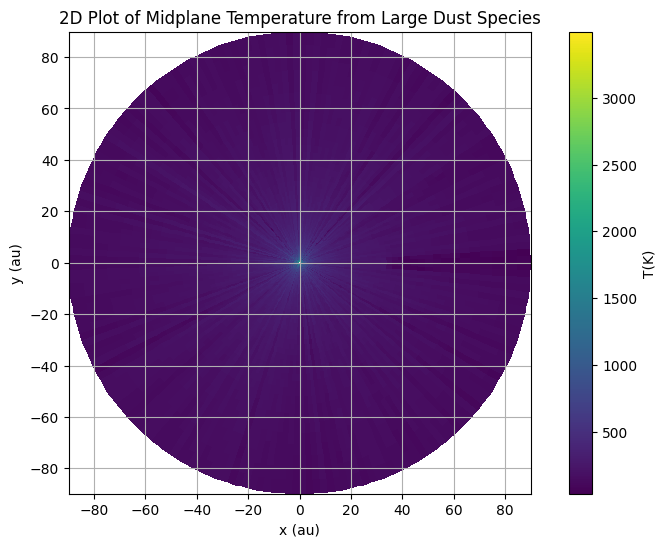

In [25]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, 0, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, -1, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 0, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


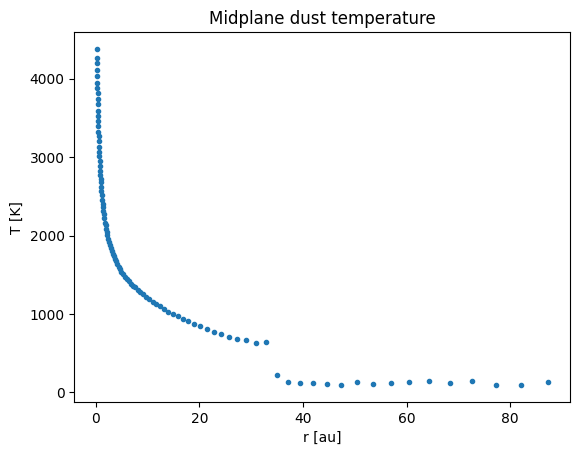

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


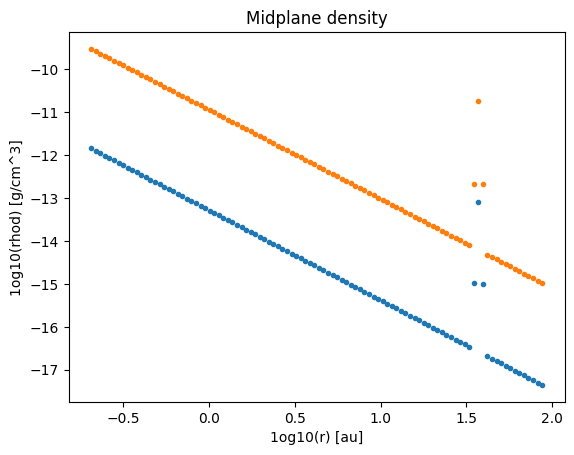

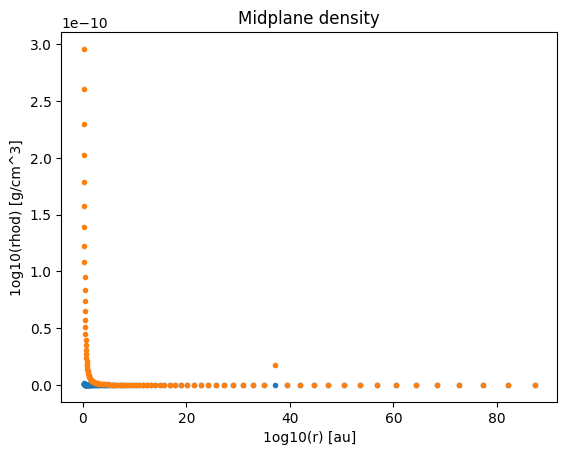

In [26]:
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import numpy as np
import math
import os

from radmc3dPy.analyze import *  
from radmc3dPy.natconst import * 

#
# First set up the model with
#
#   python problem_setup.py
#
# Then make sure to have run
#
#   radmc3d mctherm
#
#os.system('radmc3d mctherm')
#
# to compute the dust temperature before you run this plotting session.
#
# Now plot the temperature profile
#
a    = readData()
r    = a.grid.x[:]
temp = a.dusttemp[:,15,0,0]  #r,theta, phi, last one is pick the first dust species
# shape should be cosistent for different layers
plt.figure()
plt.plot(r/au,temp,'.')
plt.xlabel('r [au]')
plt.ylabel('T [K]')
plt.title('Midplane dust temperature')
plt.show()

#
a    = readData()
r    = a.grid.x[:]
rhodsm = a.rhodust[:,-1,0,0]  #r,theta, phi, last one is pick the zeroth orfirst dust species
rhodbg = a.rhodust[:,-1,0,1]
# shape should be cosistent for different layers
plt.figure()
plt.plot(np.log10(r/au),np.log10(rhodsm),'.')
plt.plot(np.log10(r/au),np.log10(rhodbg),'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


plt.figure()
plt.plot(r/au,rhodsm,'.')
plt.plot(r/au,rhodbg,'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


In [2]:
# Read to FITS information

from astropy.io import fits
from astropy.table import Table

# Path to the FITS file
fits_file_path = 'CPD_PPD_PDS70.fits'

# Open the FITS file and read the header
with fits.open(fits_file_path) as hdul:
    # Access the primary HDU (Header/Data Unit)
    primary_hdu = hdul[0]
    
    # Get the header
    header = primary_hdu.header

# Convert the header to a table
header_items = list(header.items())
header_table = Table(rows=header_items, names=['Keyword', 'Value'])

# Print the table
print(header_table)

Traceback (most recent call last):
  File "c:\Users\LHEM\.vscode\extensions\ms-python.python-2024.22.2-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 3, in <module>
ModuleNotFoundError: No module named 'astropy'

